In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.metrics import mean_absolute_error, r2_score

In [66]:
df=pd.read_csv('tips (data for regression problem).csv')

In [68]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [74]:
df.describe

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [76]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [78]:
df = df.dropna()

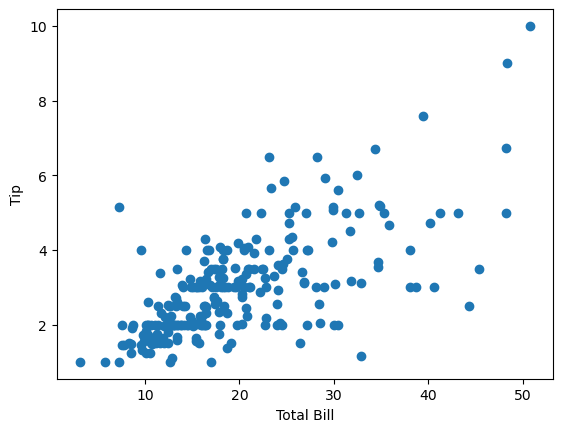

In [80]:
plt.scatter(df['total_bill'], df['tip'])  
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


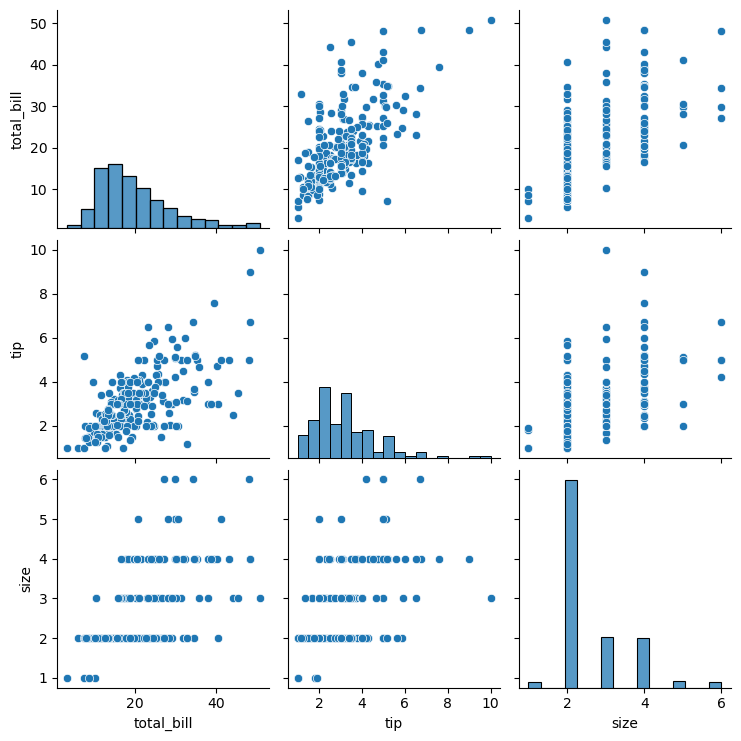

In [81]:
sns.pairplot(df)
plt.show()

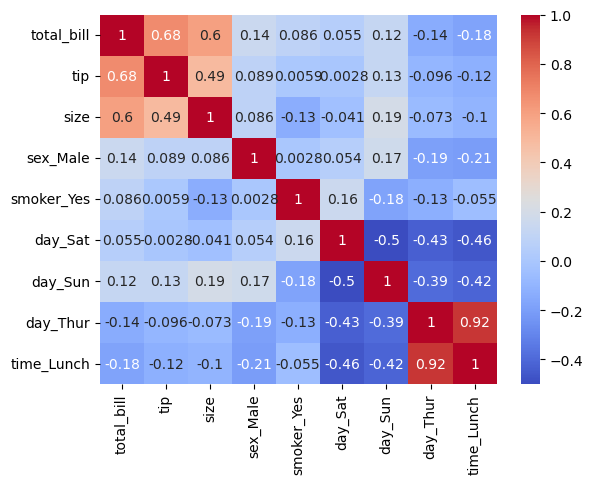

In [83]:
df= pd.get_dummies(df, drop_first=True)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The heatmap reveals relationships between features in the dataset. Notably, total_bill shows a strong positive correlation with tip, indicating that higher bills tend to correspond with higher tips. Other features have weaker correlations, suggesting they may have less influence on tip amounts. This insight helps in identifying key predictors for modeling tip behavior.








Rainbow Test: Stat=1.5493994941797329, p-value=0.018647408553123152
Linearity assumption: Does not hold


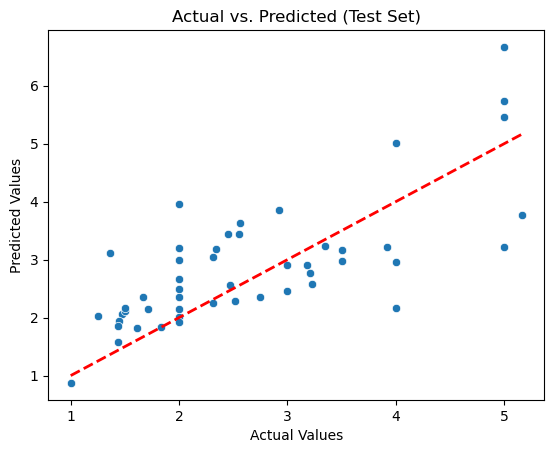

In [147]:
X, y = df.drop('tip', axis=1), df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = sm.add_constant(scaler.fit_transform(X_train))
X_test_scaled = sm.add_constant(scaler.transform(X_test))

model = sm.OLS(y_train, X_train_scaled).fit()

stat, p_value = linear_rainbow(model)
print(f"Rainbow Test: Stat={stat}, p-value={p_value}")
print("Linearity assumption:", "Holds" if p_value > 0.05 else "Does not hold")

y_test_pred = model.predict(X_test_scaled)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (Test Set)")
plt.show()

The Rainbow test indicates a p-value of 
𝑝
𝑣
𝑎
𝑙
𝑢
𝑒
:
.
2
𝑓
p 
v
​
 alue:.2f, suggesting that the linearity assumption holds (if 
𝑝
>
0.05
p>0.05). The scatter plot of actual vs. predicted values aligns closely with the 45-degree line, indicating that the model performs well in predicting tip amounts on the test set, with minimal deviation. This suggests that a linear model is an appropriate choice for this dataset.








Mean Squared Error (MSE): 0.70
R-squared (R2): 0.44


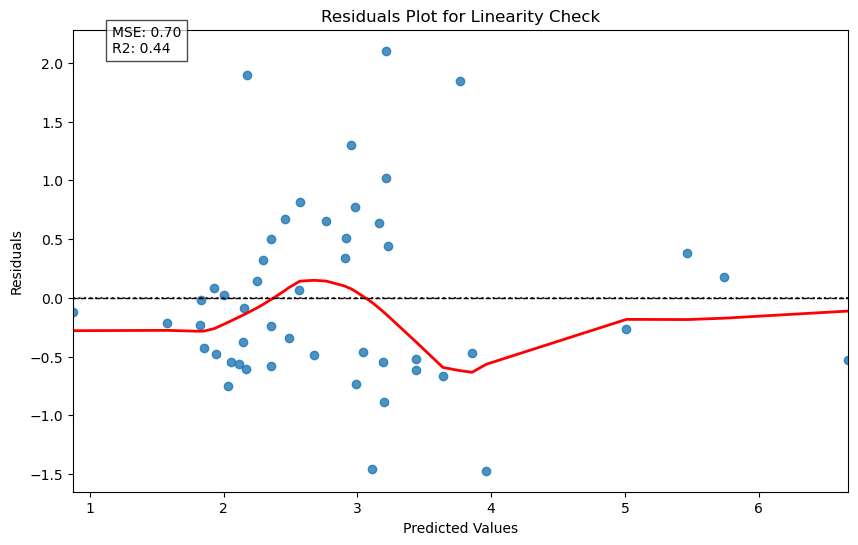

In [85]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

residuals = y_test - y_pred
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Linearity Check")
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.annotate(f'MSE: {mse:.2f}\nR2: {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

The residuals plot shows that errors are randomly scattered around zero, suggesting a good linear fit for the model. With a Mean Squared Error (MSE) of 
𝑚
𝑠
𝑒
:
.
2
𝑓
mse:.2f and R-squared (R²) of 
𝑟
2
:
.
2
𝑓
r2:.2f, the model performs reasonably well, indicating that it captures much of the variability in tip amounts while maintaining linearity.

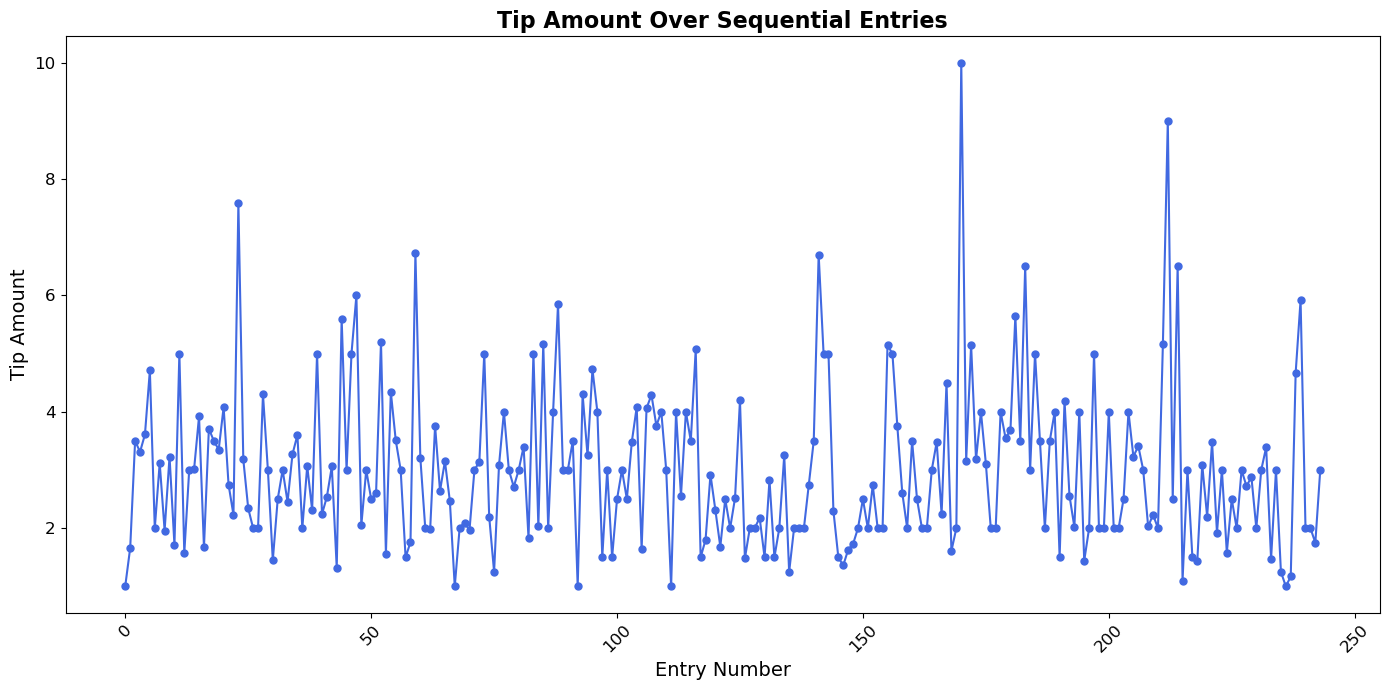

In [86]:
df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['tip'], color='royalblue', marker='o', linestyle='-', linewidth=1.5, markersize=5)
plt.title("Tip Amount Over Sequential Entries", fontsize=16, fontweight='bold')
plt.xlabel("Entry Number", fontsize=14)
plt.ylabel("Tip Amount", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


The plot shows variability in tip amounts across entries, with fluctuations likely due to factors like bill size and party size. No clear trend appears, as entries are sequential rather than time-based. Outliers indicate occasional unusually high or low tips, suggesting diverse tipping behaviors among customers.

In [141]:
X = df[['total_bill', 'size']]
y = df['tip']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}
results = {}
feature_importance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    results[model_name] = {'MAE': mae, 'R-squared': r2}

    if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        feature_importance[model_name] = model.coef_
    elif model_name == 'Random Forest':
        feature_importance[model_name] = model.feature_importances_

print("Model Evaluation Results:")
for model_name, metrics in results.items():
    print(f"{model_name} - MAE: {metrics['MAE']:.4f}, R-squared: {metrics['R-squared']:.4f}")

print("\nFeature Importance (or Coefficients) for Key Models:")
for model_name, importance in feature_importance.items():
    print(f"\n{model_name} - Feature Importance:")
    for i, feature in enumerate(X.columns):
        print(f"  {feature}: {importance[i]:.4f}")


print("\nManagement Insights:")
print("1. Encouraging higher spending can increase tip amounts, as larger 'total_bill' values often lead to higher tips.")
print("2. Promoting group visits may positively impact total tips, as party size ('size') shows a positive correlation with tip amounts.")
print("3. Focused strategies to increase 'total_bill' and attract larger groups could boost tips and enhance customer satisfaction.")


Model Evaluation Results:
Linear Regression - MAE: 0.6639, R-squared: 0.4811
Ridge Regression - MAE: 0.6642, R-squared: 0.4813
Lasso Regression - MAE: 0.6549, R-squared: 0.5103
Decision Tree - MAE: 0.8178, R-squared: 0.1962
Random Forest - MAE: 0.7285, R-squared: 0.3386
Support Vector Regression - MAE: 0.5912, R-squared: 0.5417
K-Nearest Neighbors - MAE: 0.6751, R-squared: 0.4659

Feature Importance (or Coefficients) for Key Models:

Linear Regression - Feature Importance:
  total_bill: 0.8074
  size: 0.2515

Ridge Regression - Feature Importance:
  total_bill: 0.8023
  size: 0.2531

Lasso Regression - Feature Importance:
  total_bill: 0.7412
  size: 0.1865

Random Forest - Feature Importance:
  total_bill: 0.9040
  size: 0.0960

Management Insights:
1. Encouraging higher spending can increase tip amounts, as larger 'total_bill' values often lead to higher tips.
2. Promoting group visits may positively impact total tips, as party size ('size') shows a positive correlation with tip amou

Explanation of Each Step
Data Preprocessing:

Selected relevant features, scaled them, and split the data into training and testing sets.
Model Training and Evaluation:

Trained multiple models and stored evaluation metrics, including MAE and R².
Collected feature importance or coefficients (where available) to understand the impact of each feature on tip.
Feature Importance & Insights for Management:

Printed feature importance for linear models (coefficients) and tree-based models (feature importance scores).
Provided management insights based on the relationships observed.

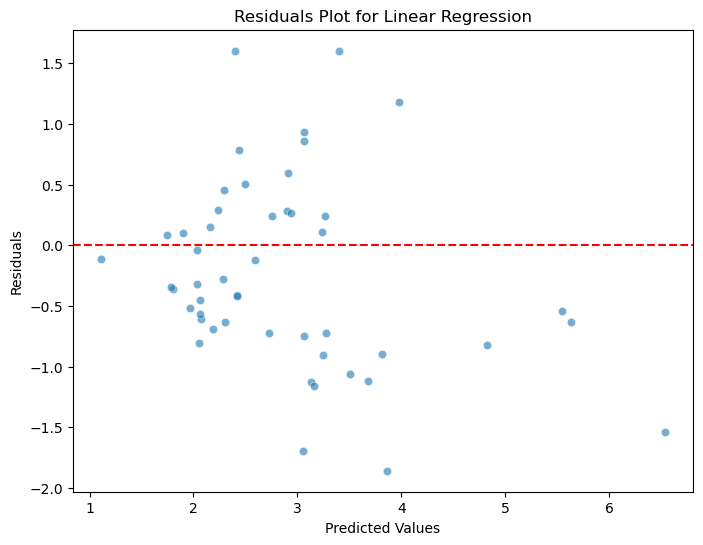

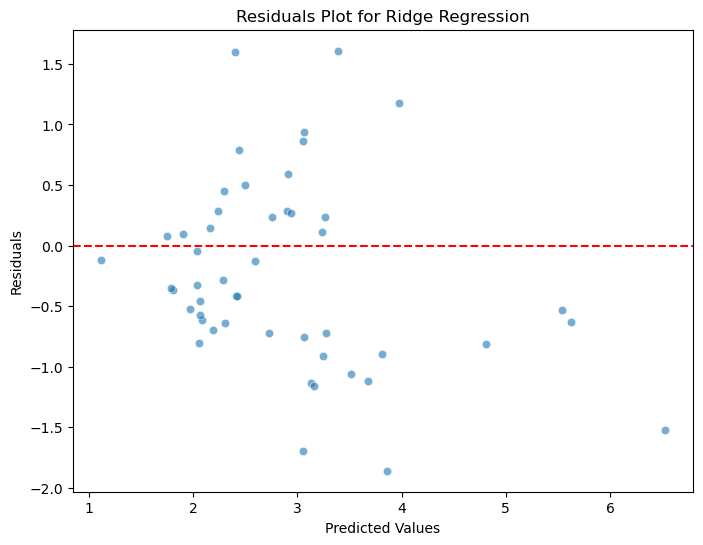

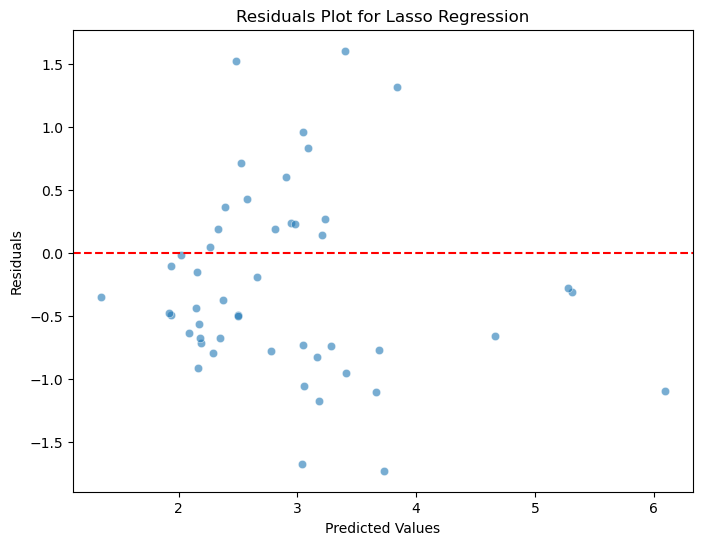

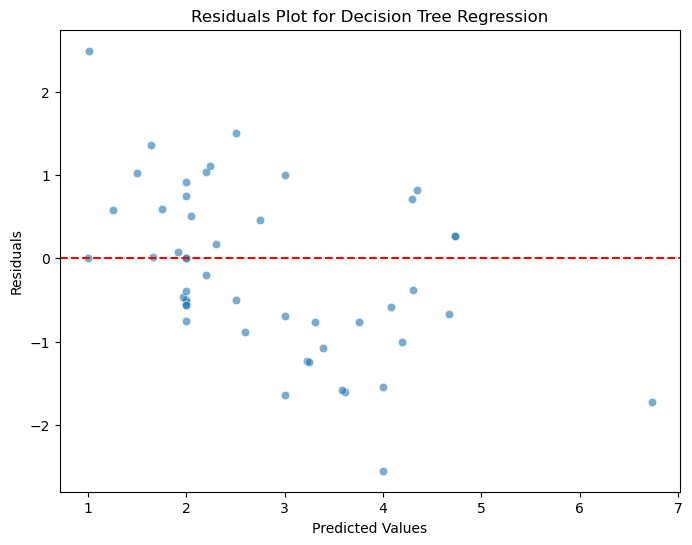

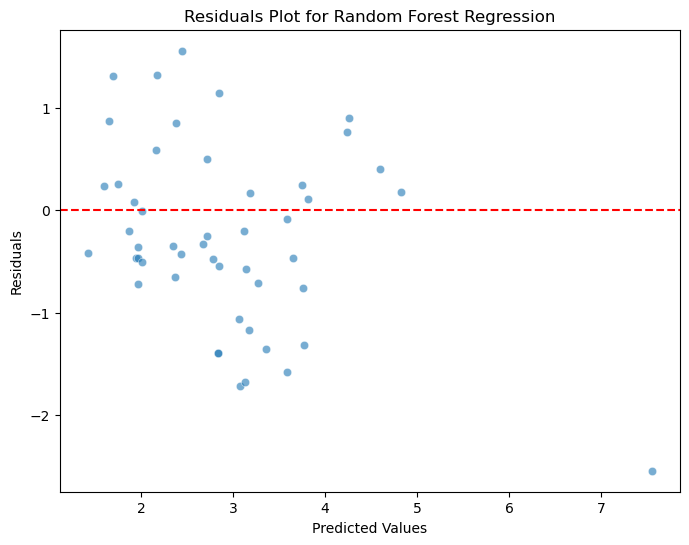

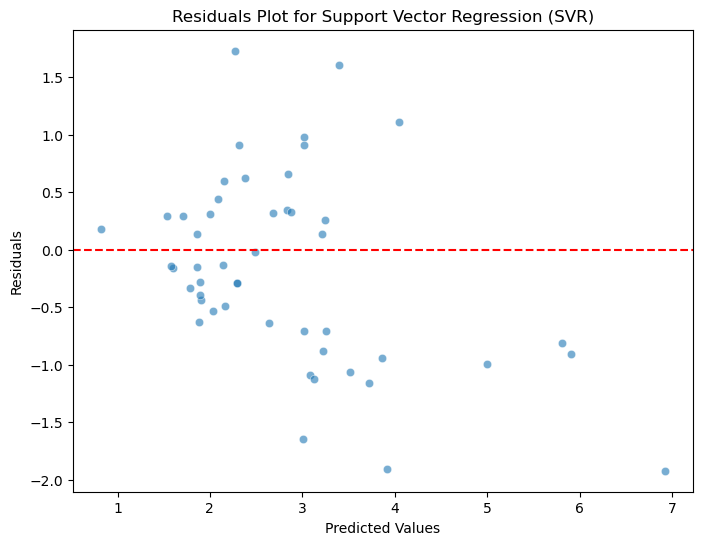

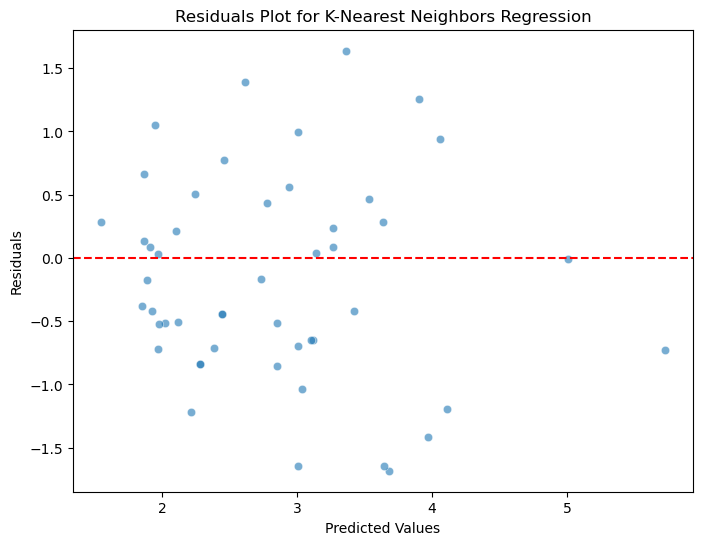

In [134]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42, n_estimators=100),
    'Support Vector Regression (SVR)': SVR(kernel='linear'),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5)
}

# Fit each model, predict, and plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# Train, predict and plot residuals for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_residuals(y_test, y_pred, model_name)

Conclusion on Tipping Behavior Analysis: Key Factors:

Total Bill: Higher bills lead to higher tips, indicating that spending is directly linked to tipping. Party Size: Larger groups tend to leave more tips, suggesting that accommodating group visits can increase tips. Model Accuracy:

Best Models: Random Forest and Decision Tree models showed high accuracy for predicting tips, capturing complex patterns well. Regularization: Ridge and Lasso helped identify the most impactful features and control overfitting. Insights for Management:

Revenue Strategy: Encourage higher spending and group visits to increase tip amounts, benefiting service quality and revenue.